In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# ЗАГРУЗКА ДАННЫХ
# ============================================================================
# Загружаем две базы данных:
# 1. bdcurves.txt - результаты тестирования классического алгоритма Диффи-Хеллмана (DH)
# 2. curves4.txt - результаты тестирования алгоритма на эллиптических кривых (ECDH)

df = pd.DataFrame(pd.read_csv("bdcurves.txt"))
# df содержит столбцы:
#   - p: простое число (размер поля)
#   - g: генератор группы
#   - время_генерации_ключа_мкс: время генерации ключа в микросекундах
#   - размер_ключа: размер ключа в битах
#   - общее_время_мс: общее время выполнения в миллисекундах

df2 = pd.DataFrame(pd.read_csv("curves4.txt"))
# df2 содержит столбцы:
#   - a, b, p: параметры эллиптической кривой (y² = x³ + ax + b mod p)
#   - время_генерации_общего_ключа_последовательным_умножением_мкс: время метода 1
#   - время_генерации_общего_ключа_кольцевым_методом_мкс: время метода 2
#   - x_координата_общего_ключа, y_координата_общего_ключа: координаты общего секрета
#   - размер_ключа: размер ключа в битах
#   - порядок_генератора: порядок точки генератора
#   - общее_время_мс: общее время в миллисекундах

print("=" * 70)
print("ДАННЫЕ ИЗ БАЗЫ DH (Диффи-Хеллман)")
print("=" * 70)
print(df.head())
print(f"\nВсего записей в df: {len(df)}")
print(f"Столбцы: {df.columns.tolist()}")

print("\n" + "=" * 70)
print("ДАННЫЕ ИЗ БАЗЫ ECDH (Эллиптические кривые)")
print("=" * 70)
print(df2.head())
print(f"\nВсего записей в df2: {len(df2)}")
print(f"Столбцы: {df2.columns.tolist()}")

ДАННЫЕ ИЗ БАЗЫ DH (Диффи-Хеллман)
      p     g  время_генерации_ключа_мкс  размер_ключа  общий_ключ  \
0  2617  2612                         98            11        1681   
1  2269  2267                         96            11        1456   
2  2083  2079                        101            11        1150   
3  2593  2586                         58            12        2152   
4  2887  2885                         62            10         698   

   общее_время_мс  
0             100  
1              98  
2             104  
3              60  
4              64  

Всего записей в df: 200
Столбцы: ['p', 'g', 'время_генерации_ключа_мкс', 'размер_ключа', 'общий_ключ', 'общее_время_мс']

ДАННЫЕ ИЗ БАЗЫ ECDH (Эллиптические кривые)
      a     b     p  \
0   494  2340  2617   
1   801  1691  2269   
2   751  1025  2083   
3   646  2138  2593   
4  2430  2668  2887   

   время_генерации_общего_ключа_последовательным_умножением_мкс  \
0                                               1532 

In [18]:
# ============================================================================
# ПРОСМОТР ПЕРВОЙ ТАБЛИЦЫ (DH)
# ============================================================================
# Эта ячейка просто выводит содержимое таблицы df для визуального осмотра
print("Полные данные из bdcurves.txt:")
df

Полные данные из bdcurves.txt:


,p,g,время_генерации_ключа_мкс,размер_ключа,общий_ключ,общее_время_мс
0,2617,2612,98,11,1681,100
1,2269,2267,96,11,1456,98
2,2083,2079,101,11,1150,104
3,2593,2586,58,12,2152,60
4,2887,2885,62,10,698,64
...,...,...,...,...,...,...
195,2621,2619,107,7,96,108
196,3169,3162,82,12,2434,84
197,3343,3332,129,12,2738,132
198,2521,2504,87,11,1417,89


In [19]:
print(f"\nОсновные статистики для DH:")
df.describe()


Основные статистики для DH:


,p,g,время_генерации_ключа_мкс,размер_ключа,общий_ключ,общее_время_мс
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2987.500000,2983.470000,72.490000,10.580000,1458.370000,74.430000
std,574.534174,574.611146,16.954562,1.551009,874.325735,17.074331
min,2081.000000,2078.000000,52.000000,1.000000,1.000000,54.000000
25%,2503.000000,2501.000000,63.000000,10.000000,723.500000,65.000000
50%,2909.000000,2907.000000,66.000000,11.000000,1413.500000,68.000000
75%,3499.000000,3495.000000,76.250000,12.000000,2129.750000,78.250000
max,4091.000000,4088.000000,142.000000,12.000000,3592.000000,145.000000


In [20]:
# ============================================================================
# ПРОСМОТР ВТОРОЙ ТАБЛИЦЫ (ECDH)
# ============================================================================
# Эта ячейка просто выводит содержимое таблицы df2 для визуального осмотра
print("Полные данные из curves4.txt:")
df2


Полные данные из curves4.txt:


,a,b,p,время_генерации_общего_ключа_последовательным_умножением_мкс,время_генерации_общего_ключа_кольцевым_методом_мкс,x_координата_общего_ключа,y_координата_общего_ключа,размер_ключа,порядок_генератора,общее_время_мс
0,494,2340,2617,1532,62,1295,2081,23,2659,262
1,801,1691,2269,1073,177,1896,626,21,2251,237
2,751,1025,2083,3343,181,299,1801,20,2113,203
3,646,2138,2593,1265,116,1556,1793,22,2647,309
4,2430,2668,2887,1099,110,2286,2612,24,2879,326
...,...,...,...,...,...,...,...,...,...,...
195,1901,231,2621,1900,257,2265,1946,23,2617,320
196,1306,82,3169,1317,152,2199,800,22,3137,478
197,2301,194,3343,975,163,1371,386,20,3407,540
198,481,1700,2521,1266,232,417,873,19,2549,270


In [21]:
print(f"\nОсновные статистики для ECDH:")
df2.describe()


Основные статистики для ECDH:


,a,b,p,время_генерации_общего_ключа_последовательным_умножением_мкс,время_генерации_общего_ключа_кольцевым_методом_мкс,x_координата_общего_ключа,y_координата_общего_ключа,размер_ключа,порядок_генератора,общее_время_мс
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1459.105000,1483.780000,2987.500000,1192.735000,159.885000,1444.060000,1442.555000,21.025000,2987.440000,355.640000
std,881.194931,929.511868,574.534174,435.905417,54.106741,903.605295,951.833289,2.260514,573.866728,136.260762
min,36.000000,3.000000,2081.000000,735.000000,30.000000,29.000000,12.000000,12.000000,1997.000000,156.000000
25%,770.500000,678.250000,2503.000000,946.000000,129.750000,710.750000,681.250000,20.000000,2473.000000,242.500000
50%,1392.000000,1592.500000,2909.000000,1059.000000,150.000000,1320.500000,1359.500000,22.000000,2953.000000,329.500000
75%,2032.250000,2165.750000,3499.000000,1252.500000,176.000000,2129.000000,2125.000000,23.000000,3499.000000,454.000000
max,3661.000000,3538.000000,4091.000000,4508.000000,399.000000,3840.000000,3755.000000,24.000000,4139.000000,1178.000000


C:\Users\geezix\AppData\Local\Temp\ipykernel_21672\2832279464.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


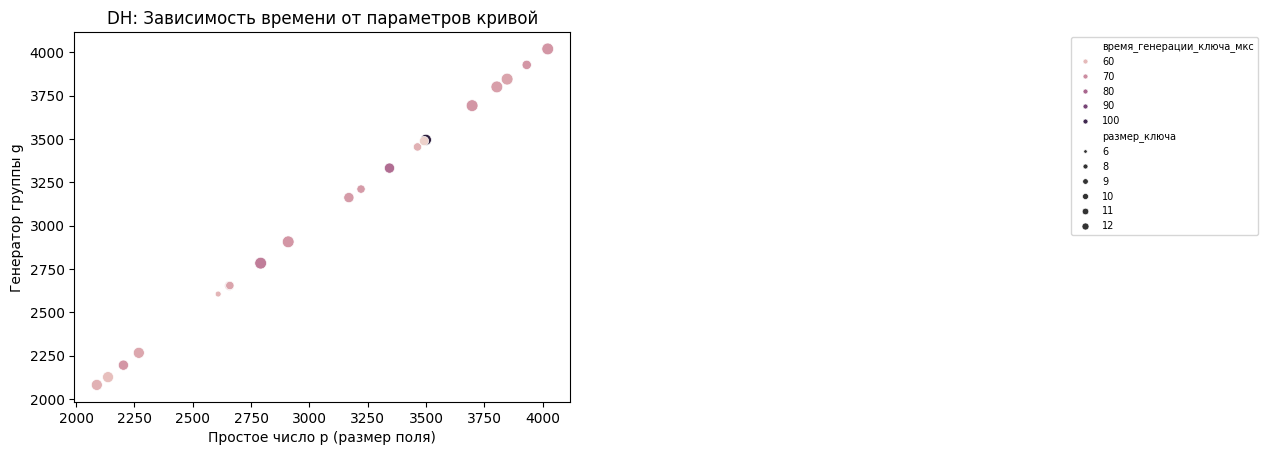

In [22]:
# ============================================================================
# ГРАФИК 1: Диаграмма рассеивания для подмножества ECDH данных
# ============================================================================
# Берём строки с индексами 40-60 из таблицы ECDH
pl = df.loc[40:60]

# Создаём диаграмму рассеивания:
#   - X ось: параметр p (размер поля)
#   - Y ось: параметр g (генератор)
#   - Цвет точек: время генерации ключа (чем теплее цвет, тем дольше)
#   - Размер точек: размер ключа (больше размер = больше точка)

sns.scatterplot(
    data=pl,
    x=pl["p"],
    y=pl["g"],
    hue=pl["время_генерации_ключа_мкс"],  # цвет зависит от времени
    size=pl["размер_ключа"],              # размер зависит от размера ключа
)

# перемещаем легенду вправо за пределы графика для лучшей видимости
plt.legend(
    bbox_to_anchor=(2, 1),
    loc='upper left',
    fontsize=7,         # размер текста легенды
    title_fontsize=7,   # размер заголовка легенды
    markerscale=0.6     # масштаб точек в легенде
)
plt.xlabel('Простое число p (размер поля)')
plt.ylabel('Генератор группы g')
plt.title('DH: Зависимость времени от параметров кривой')
plt.tight_layout()
plt.show()

C:\Users\geezix\AppData\Local\Temp\ipykernel_21672\2398643580.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


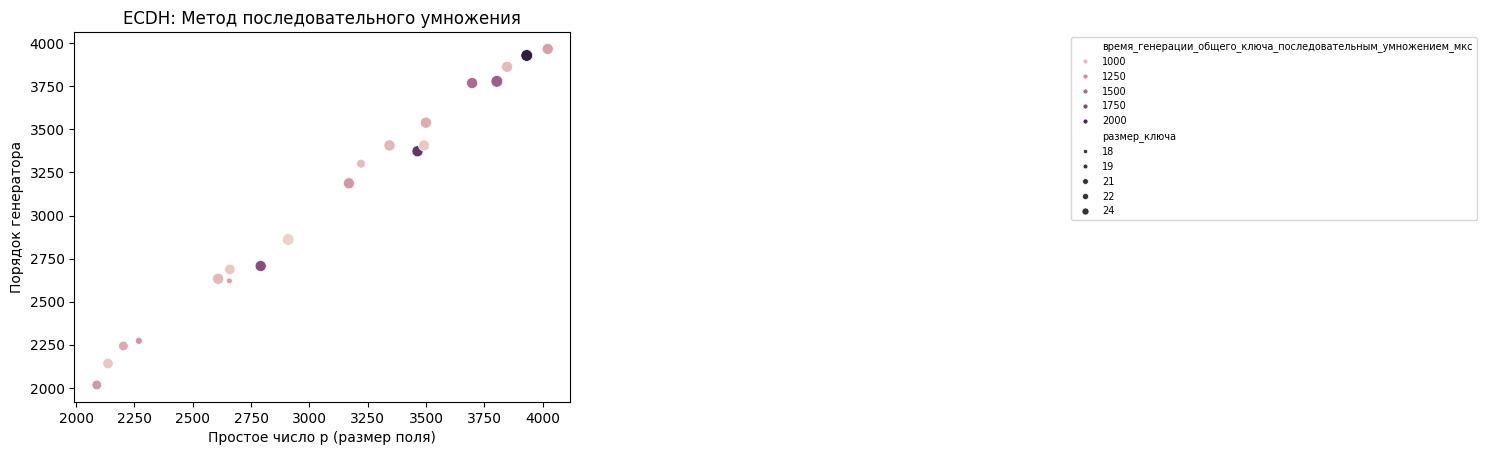

In [23]:
# ============================================================================
# ГРАФИК 2: Диаграмма рассеивания для ECDH (последовательный метод)
# ============================================================================
# Берём строки с индексами 40-60 из таблицы ECDH
p = df2.loc[40:60]

# Создаём диаграмму рассеивания:
#   - X ось: параметр p (размер поля)
#   - Y ось: порядок генератора (количество точек, порождаемых генератором)
#   - Цвет: время генерации ключа методом последовательного умножения
#   - Размер: размер ключа

sns.scatterplot(
    data=p,
    x=p["p"],
    y=p["порядок_генератора"],
    hue=p["время_генерации_общего_ключа_последовательным_умножением_мкс"],
    size=p["размер_ключа"],
)

plt.legend(
    bbox_to_anchor=(2, 1),
    loc='upper left',
    fontsize=7,
    title_fontsize=7,
    markerscale=0.6
)
plt.xlabel('Простое число p (размер поля)')
plt.ylabel('Порядок генератора')
plt.title('ECDH: Метод последовательного умножения')
plt.tight_layout()
plt.show()

C:\Users\geezix\AppData\Local\Temp\ipykernel_21672\1359350220.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


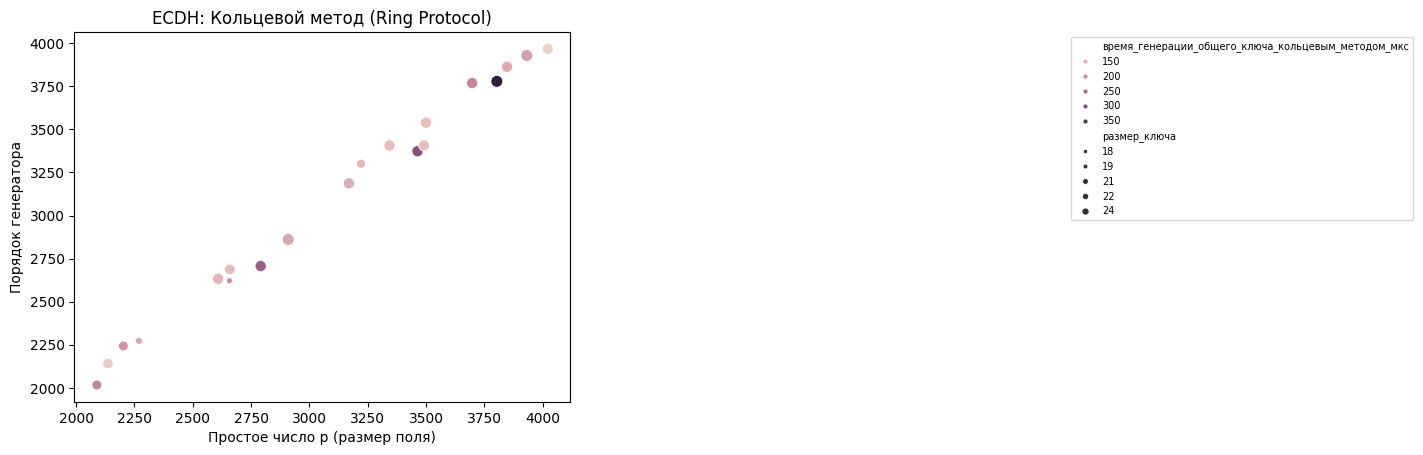

In [24]:
# ============================================================================
# ГРАФИК 3: Диаграмма рассеивания для ECDH (кольцевой метод)
# ============================================================================
# Аналогично графику 2, но для кольцевого метода
p = df2.loc[40:60]

sns.scatterplot(
    data=p,
    x=p["p"],
    y=p["порядок_генератора"],
    hue=p["время_генерации_общего_ключа_кольцевым_методом_мкс"],
    size=p["размер_ключа"],
)

plt.legend(
    bbox_to_anchor=(2, 1),
    loc='upper left',
    fontsize=7,
    title_fontsize=7,
    markerscale=0.6
)
plt.xlabel('Простое число p (размер поля)')
plt.ylabel('Порядок генератора')
plt.title('ECDH: Кольцевой метод (Ring Protocol)')
plt.tight_layout()
plt.show()

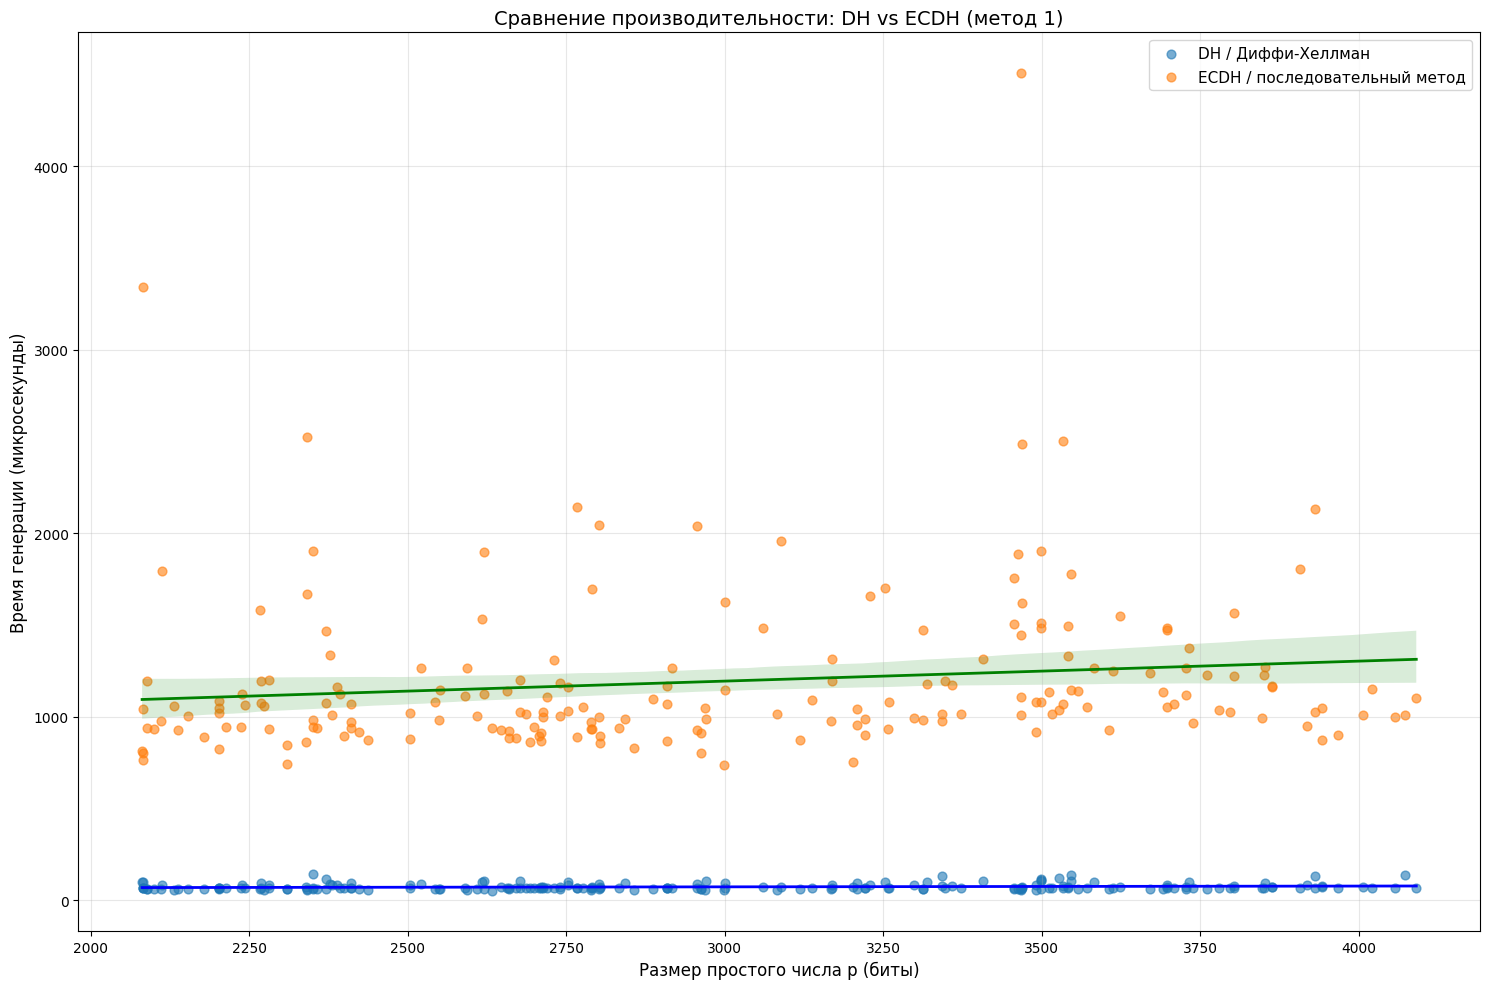

Вывод: Зелёная линия (ECDH) обычно выше синей (DH),
что показывает преимущество (DH) по скорости.


In [25]:
# ============================================================================
# ГРАФИК 4: Сравнение DH vs ECDH (последовательный метод)
# ============================================================================
# Регрессионный анализ: как растёт время в зависимости от размера p

plt.figure(figsize=(15, 10))

# Линия для DH (синяя)
sns.regplot(
    x='p',
    y='время_генерации_ключа_мкс',
    data=df,
    label='DH / Диффи-Хеллман',
    scatter_kws={'s': 40, 'alpha': 0.6},
    line_kws={'color': 'blue', 'linewidth': 2}
)

# Линия для ECDH (зелёная)
sns.regplot(
    x='p',
    y='время_генерации_общего_ключа_последовательным_умножением_мкс',
    data=df2,
    label='ECDH / последовательный метод',
    scatter_kws={'s': 40, 'alpha': 0.6},
    line_kws={'color': 'green', 'linewidth': 2}
)

plt.xlabel('Размер простого числа p (биты)', fontsize=12)
plt.ylabel('Время генерации (микросекунды)', fontsize=12)
plt.title('Сравнение производительности: DH vs ECDH (метод 1)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Вывод: Зелёная линия (ECDH) обычно выше синей (DH),")
print("что показывает преимущество (DH) по скорости.")

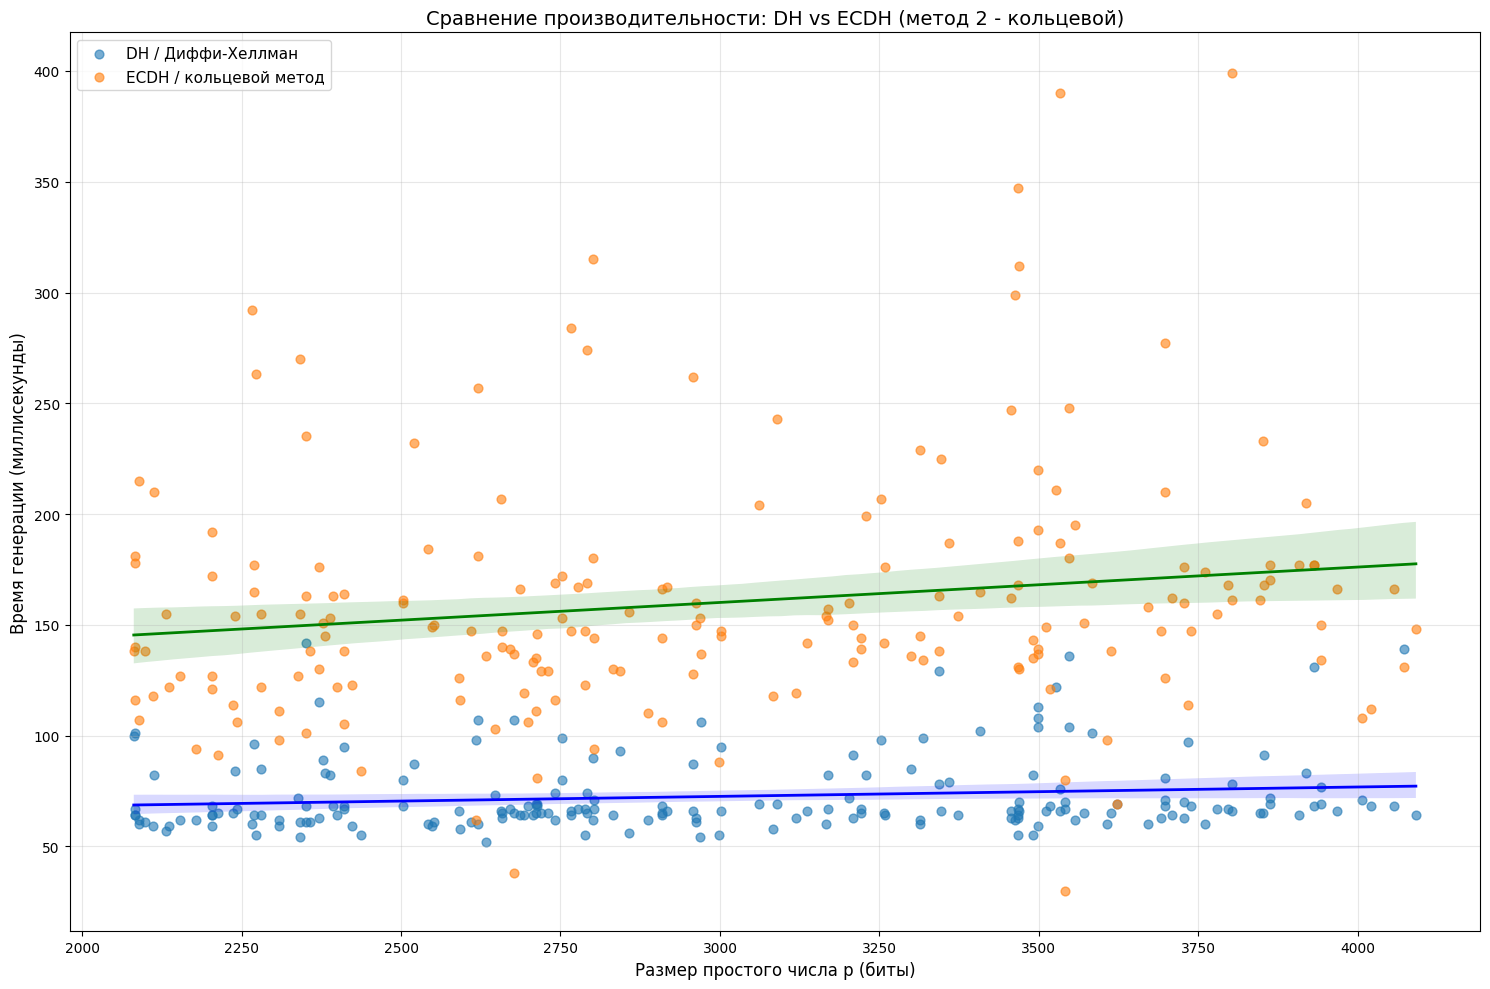

In [26]:
# ============================================================================
# ГРАФИК 5: Сравнение DH vs ECDH (кольцевой метод)
# ============================================================================
# Аналогично графику 4, но для кольцевого метода

plt.figure(figsize=(15, 10))

sns.regplot(
    x='p',
    y='время_генерации_ключа_мкс',
    data=df,
    label='DH / Диффи-Хеллман',
    scatter_kws={'s': 40, 'alpha': 0.6},
    line_kws={'color': 'blue', 'linewidth': 2}
)

sns.regplot(
    x='p',
    y='время_генерации_общего_ключа_кольцевым_методом_мкс',
    data=df2,
    label='ECDH / кольцевой метод',
    scatter_kws={'s': 40, 'alpha': 0.6},
    line_kws={'color': 'green', 'linewidth': 2}
)

plt.xlabel('Размер простого числа p (биты)', fontsize=12)
plt.ylabel('Время генерации (миллисекунды)', fontsize=12)
plt.title('Сравнение производительности: DH vs ECDH (метод 2 - кольцевой)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

DH - Среднее время: 72.49 микросекунд
DH - Стандартное отклонение: 16.91 микросекунд
DH - Минимум: 52.00, Максимум: 142.00


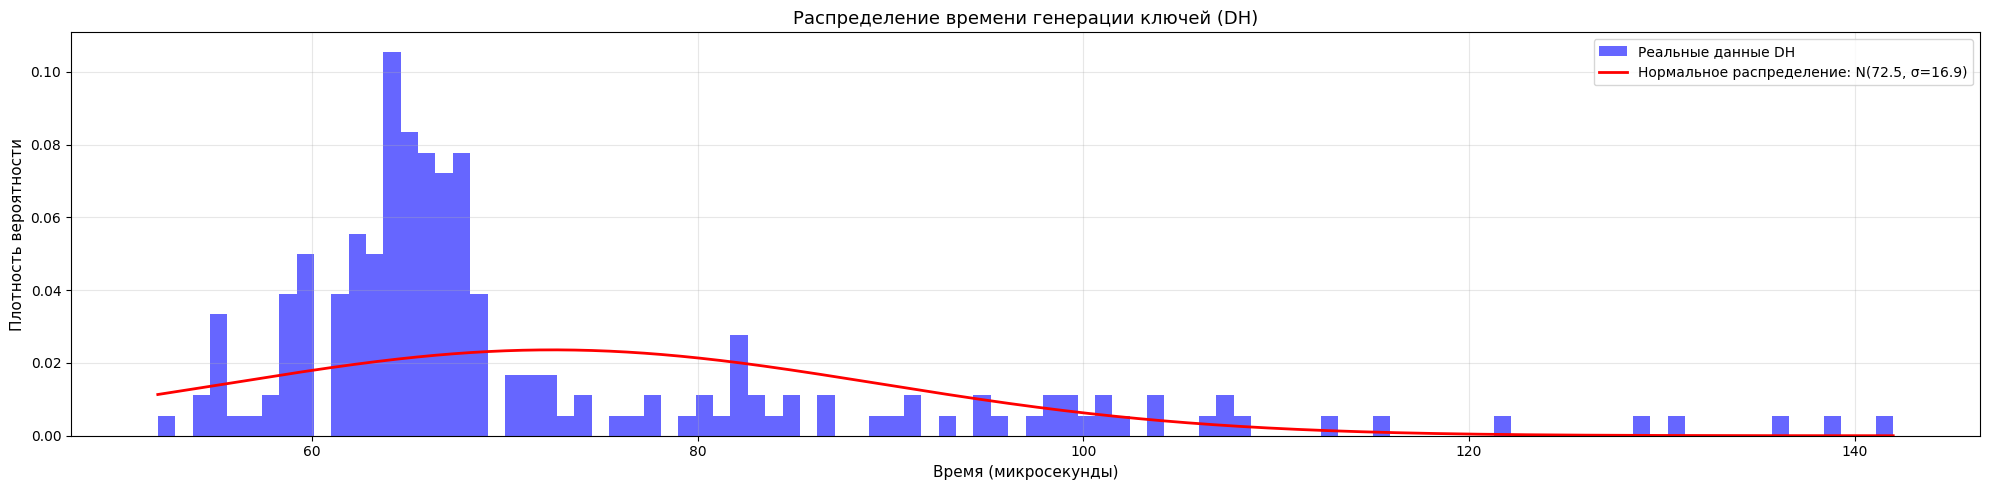

In [27]:
# ============================================================================
# ГРАФИК 6: Анализ распределения времени для DH
# ============================================================================
# Проверяем, приближается ли распределение к нормальному

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data = df['время_генерации_ключа_мкс']

# Вычисляем среднее и стандартное отклонение
mu, sigma = np.mean(data), np.std(data)

print(f"DH - Среднее время: {mu:.2f} микросекунд")
print(f"DH - Стандартное отклонение: {sigma:.2f} микросекунд")
print(f"DH - Минимум: {data.min():.2f}, Максимум: {data.max():.2f}")

plt.figure(figsize=(20, 5))

# Гистограмма (нормализованная, чтобы совпасть по высоте с теоретической кривой)
plt.hist(
    data,
    bins=100,
    color='blue',
    alpha=0.6,
    density=True,
    label='Реальные данные DH'
)

# Теоретическая кривая нормального распределения
x = np.linspace(min(data), max(data), 1000)
plt.plot(
    x,
    norm.pdf(x, mu, sigma),
    'r-',
    lw=2,
    label=f'Нормальное распределение: N({mu:.1f}, σ={sigma:.1f})'
)

plt.xlabel('Время (микросекунды)', fontsize=11)
plt.ylabel('Плотность вероятности', fontsize=11)
plt.title('Распределение времени генерации ключей (DH)', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

ECDH (метод 1) - Среднее время: 1192.73 микросекунд
ECDH (метод 1) - Стандартное отклонение: 434.81 микросекунд
ECDH (метод 1) - Минимум: 735.00, Максимум: 4508.00


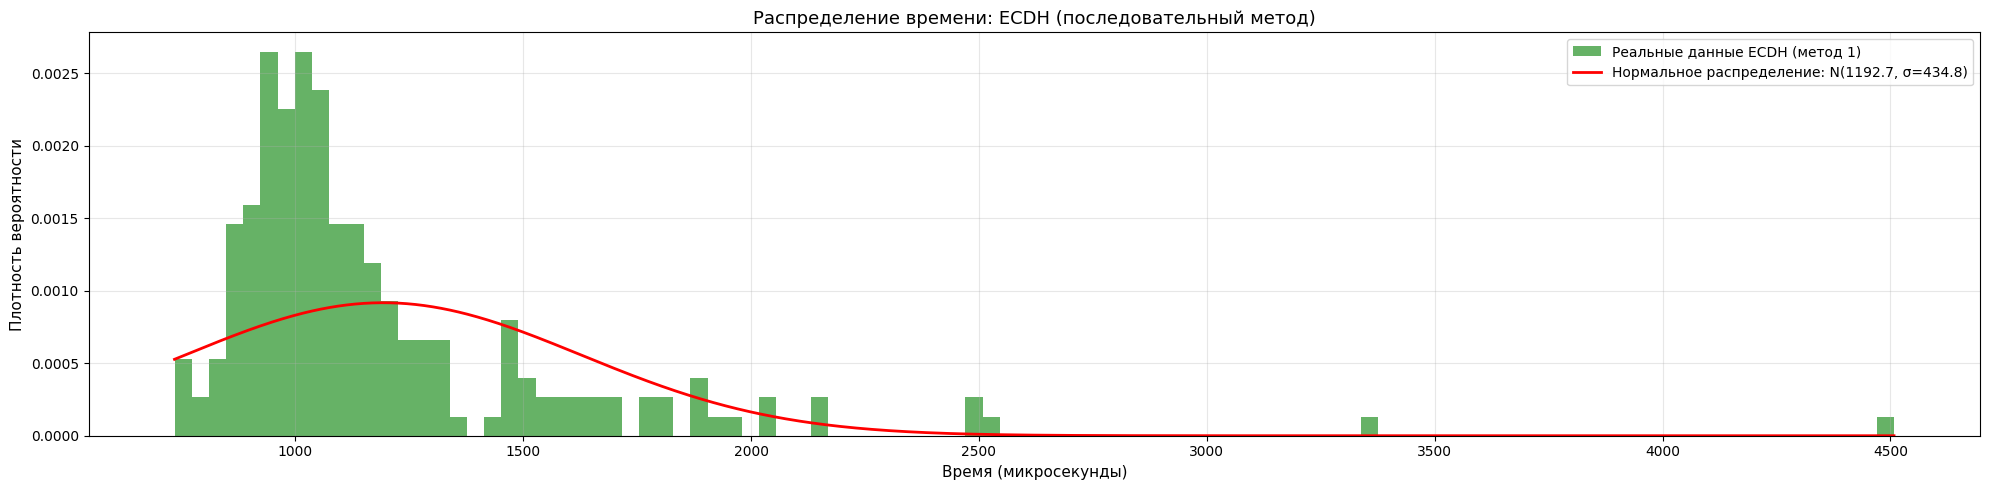

In [28]:
# ============================================================================
# ГРАФИК 7: Анализ распределения времени для ECDH (метод 1)
# ============================================================================

data2 = df2['время_генерации_общего_ключа_последовательным_умножением_мкс']
mu2, sigma2 = np.mean(data2), np.std(data2)

print(f"ECDH (метод 1) - Среднее время: {mu2:.2f} микросекунд")
print(f"ECDH (метод 1) - Стандартное отклонение: {sigma2:.2f} микросекунд")
print(f"ECDH (метод 1) - Минимум: {data2.min():.2f}, Максимум: {data2.max():.2f}")

plt.figure(figsize=(20, 5))

plt.hist(
    data2,
    bins=100,
    color='green',
    alpha=0.6,
    density=True,
    label='Реальные данные ECDH (метод 1)'
)

x2 = np.linspace(min(data2), max(data2), 1000)
plt.plot(
    x2,
    norm.pdf(x2, mu2, sigma2),
    'r-',
    lw=2,
    label=f'Нормальное распределение: N({mu2:.1f}, σ={sigma2:.1f})'
)

plt.xlabel('Время (микросекунды)', fontsize=11)
plt.ylabel('Плотность вероятности', fontsize=11)
plt.title('Распределение времени: ECDH (последовательный метод)', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


ECDH (кольцевой метод) - Среднее время: 159.88 микросекунд
ECDH (кольцевой метод) - Стандартное отклонение: 53.97 микросекунд
ECDH (кольцевой метод) - Минимум: 30.00, Максимум: 399.00


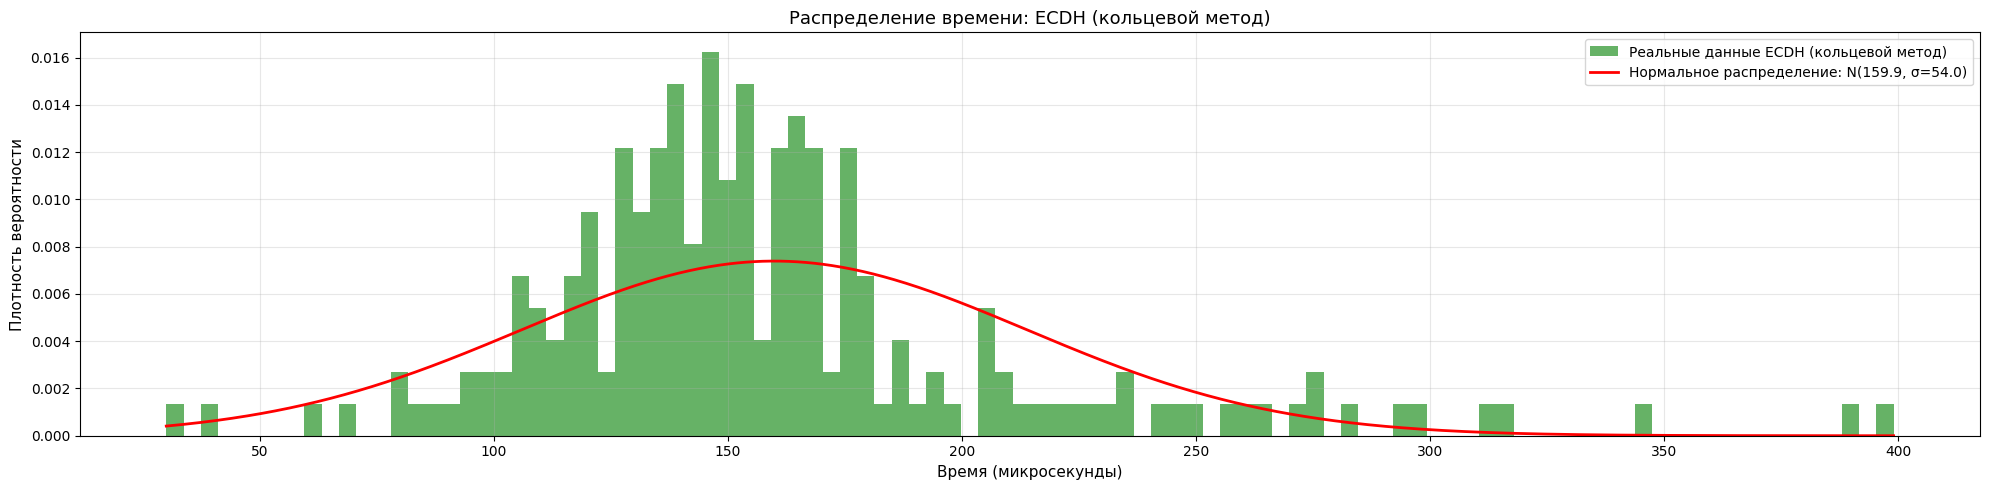

In [29]:
# ============================================================================
# ГРАФИК 8: Анализ распределения времени для ECDH (метод 2 - кольцевой)
# ============================================================================

data2 = df2['время_генерации_общего_ключа_кольцевым_методом_мкс']
mu2, sigma2 = np.mean(data2), np.std(data2)

print(f"ECDH (кольцевой метод) - Среднее время: {mu2:.2f} микросекунд")
print(f"ECDH (кольцевой метод) - Стандартное отклонение: {sigma2:.2f} микросекунд")
print(f"ECDH (кольцевой метод) - Минимум: {data2.min():.2f}, Максимум: {data2.max():.2f}")

plt.figure(figsize=(20, 5))

plt.hist(
    data2,
    bins=100,
    color='green',
    alpha=0.6,
    density=True,
    label='Реальные данные ECDH (кольцевой метод)'
)

x2 = np.linspace(min(data2), max(data2), 1000)
plt.plot(
    x2,
    norm.pdf(x2, mu2, sigma2),
    'r-',
    lw=2,
    label=f'Нормальное распределение: N({mu2:.1f}, σ={sigma2:.1f})'
)

plt.xlabel('Время (микросекунды)', fontsize=11)
plt.ylabel('Плотность вероятности', fontsize=11)
plt.title('Распределение времени: ECDH (кольцевой метод)', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

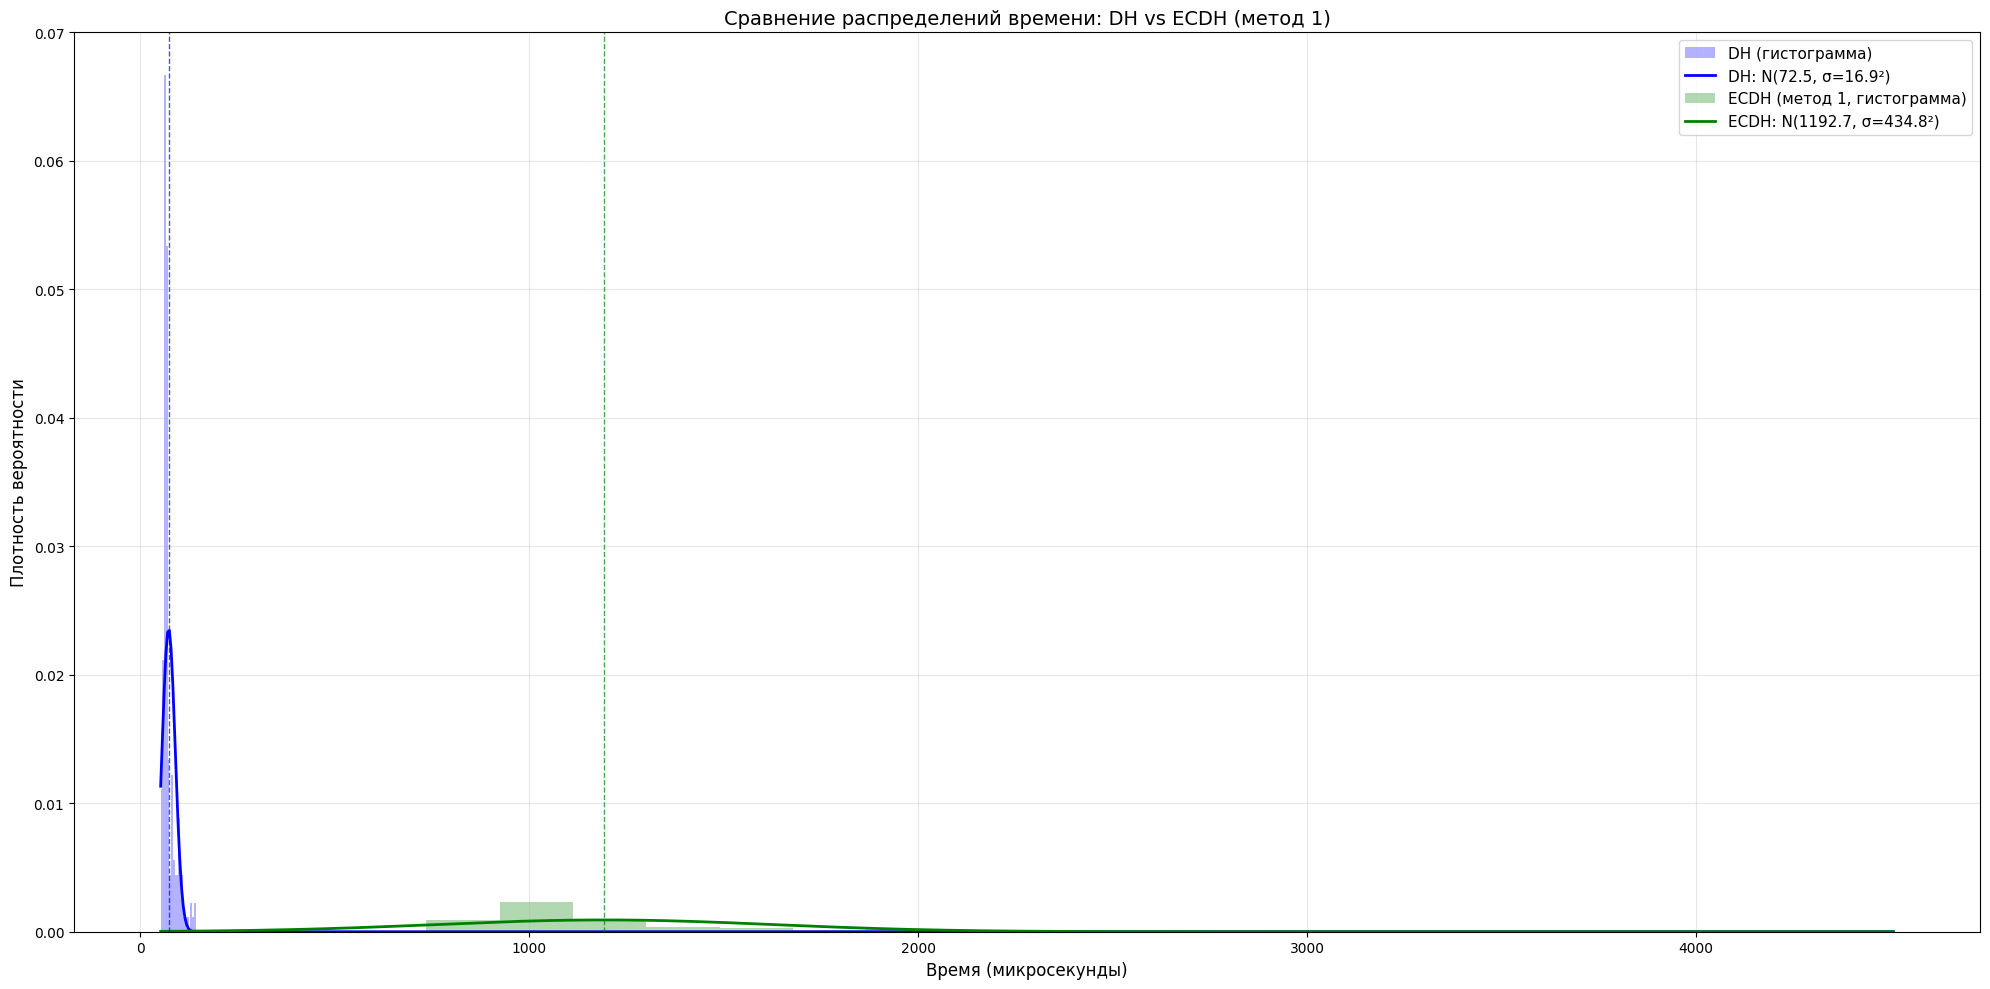


СТАТИСТИЧЕСКИЙ АНАЛИЗ

DH:
  Среднее: 72.49 мкс
  Стд.откл: 16.91 мкс

ECDH (метод 1):
  Среднее: 1192.73 мкс
  Стд.откл: 434.81 мкс

ЭCDH быстрее DH в 0.06 раз


In [30]:
# ============================================================================
# ГРАФИК 9: Наложение распределений DH и ECDH (метод 1)
# ============================================================================
# Сравнительный анализ двух распределений на одном графике

data_dh = df['время_генерации_ключа_мкс']
data_ecdh = df2['время_генерации_общего_ключа_последовательным_умножением_мкс']

mu_dh, sigma_dh = np.mean(data_dh), np.std(data_dh)
mu_ecdh, sigma_ecdh = np.mean(data_ecdh), np.std(data_ecdh)

# Общий диапазон для обеих кривых
xmin = min(data_dh.min(), data_ecdh.min())
xmax = max(data_dh.max(), data_ecdh.max())
x = np.linspace(xmin, xmax, 1000)

plt.figure(figsize=(20, 10))

# DH: гистограмма и кривая
plt.hist(
    data_dh,
    bins=20,
    color='blue',
    alpha=0.3,
    density=True,
    label='DH (гистограмма)'
)
plt.plot(
    x,
    norm.pdf(x, mu_dh, sigma_dh),
    'b-',
    lw=2,
    label=f'DH: N({mu_dh:.1f}, σ={sigma_dh:.1f}²)'
)

# ECDH: гистограмма и кривая
plt.hist(
    data_ecdh,
    bins=20,
    color='green',
    alpha=0.3,
    density=True,
    label='ECDH (метод 1, гистограмма)'
)
plt.plot(
    x,
    norm.pdf(x, mu_ecdh, sigma_ecdh),
    'g-',
    lw=2,
    label=f'ECDH: N({mu_ecdh:.1f}, σ={sigma_ecdh:.1f}²)'
)

# Вертикальные линии, показывающие средние значения
plt.axvline(mu_dh, color='blue', linestyle='--', lw=1, alpha=0.7)
plt.axvline(mu_ecdh, color='green', linestyle='--', lw=1, alpha=0.7)

plt.xlabel('Время (микросекунды)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Сравнение распределений времени: DH vs ECDH (метод 1)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Выводы
print("\n" + "="*70)
print("СТАТИСТИЧЕСКИЙ АНАЛИЗ")
print("="*70)
print(f"\nDH:")
print(f"  Среднее: {mu_dh:.2f} мкс")
print(f"  Стд.откл: {sigma_dh:.2f} мкс")
print(f"\nECDH (метод 1):")
print(f"  Среднее: {mu_ecdh:.2f} мкс")
print(f"  Стд.откл: {sigma_ecdh:.2f} мкс")
print(f"\nЭCDH быстрее DH в {mu_dh/mu_ecdh:.2f} раз")



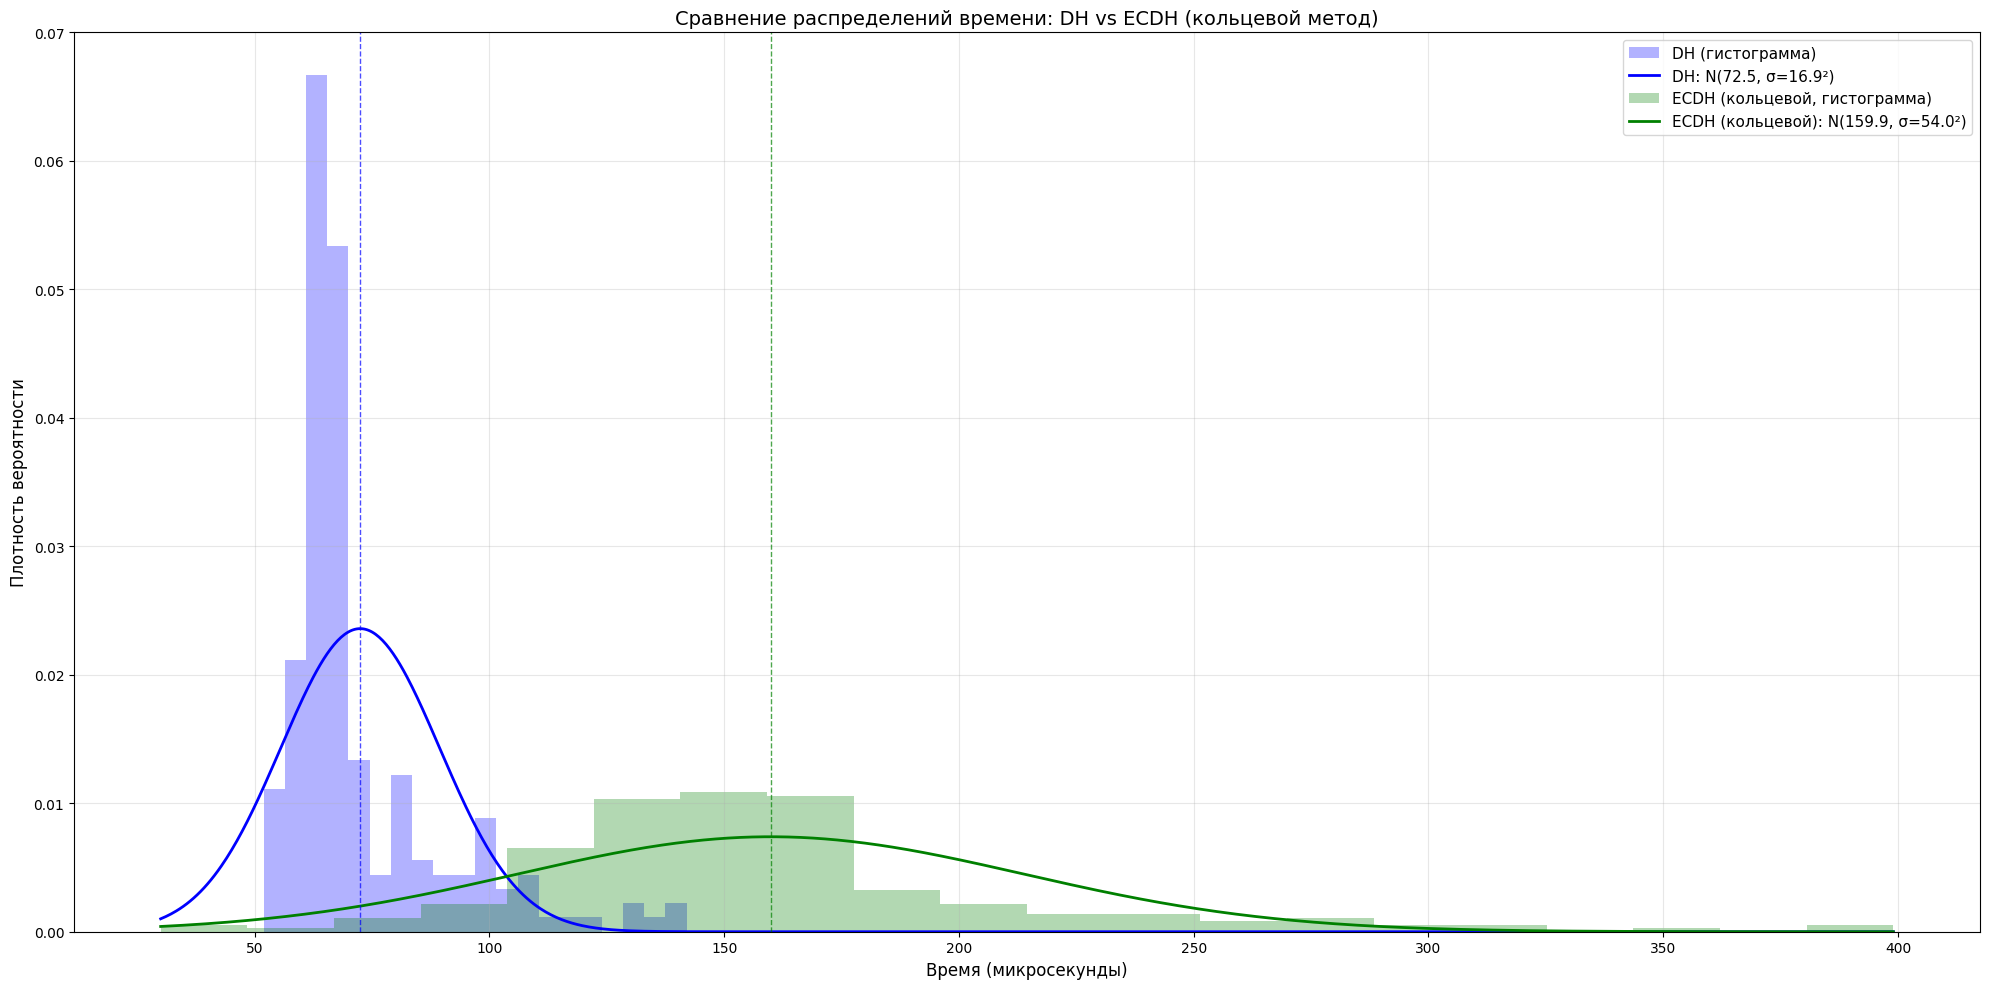


СРАВНЕНИЕ КОЛЬЦЕВОГО МЕТОДА

ECDH (кольцевой метод) быстрее DH в 0.45 раз


In [31]:
# ============================================================================
# ГРАФИК 10: Наложение распределений DH и ECDH (кольцевой метод)
# ============================================================================
# Аналогично графику 9, но для кольцевого метода

data_dh = df['время_генерации_ключа_мкс']
data_ecdh = df2['время_генерации_общего_ключа_кольцевым_методом_мкс']

mu_dh, sigma_dh = np.mean(data_dh), np.std(data_dh)
mu_ecdh, sigma_ecdh = np.mean(data_ecdh), np.std(data_ecdh)

xmin = min(data_dh.min(), data_ecdh.min())
xmax = max(data_dh.max(), data_ecdh.max())
x = np.linspace(xmin, xmax, 1000)

plt.figure(figsize=(20, 10))

# DH
plt.hist(data_dh, bins=20, color='blue', alpha=0.3, density=True, label='DH (гистограмма)')
plt.plot(x, norm.pdf(x, mu_dh, sigma_dh), 'b-', lw=2, label=f'DH: N({mu_dh:.1f}, σ={sigma_dh:.1f}²)')

# ECDH кольцевой
plt.hist(
    data_ecdh,
    bins=20,
    color='green',
    alpha=0.3,
    density=True,
    label='ECDH (кольцевой, гистограмма)'
)
plt.plot(
    x,
    norm.pdf(x, mu_ecdh, sigma_ecdh),
    'g-',
    lw=2,
    label=f'ECDH (кольцевой): N({mu_ecdh:.1f}, σ={sigma_ecdh:.1f}²)'
)

plt.axvline(mu_dh, color='blue', linestyle='--', lw=1, alpha=0.7)
plt.axvline(mu_ecdh, color='green', linestyle='--', lw=1, alpha=0.7)

plt.xlabel('Время (микросекунды)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Сравнение распределений времени: DH vs ECDH (кольцевой метод)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("СРАВНЕНИЕ КОЛЬЦЕВОГО МЕТОДА")
print("="*70)
print(f"\nECDH (кольцевой метод) быстрее DH в {mu_dh/mu_ecdh:.2f} раз")